# Loading Data

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iba-datathon-regression-xay12/sample_submission.csv
/kaggle/input/iba-datathon-regression-xay12/data-dictionary.txt.txt
/kaggle/input/iba-datathon-regression-xay12/train_data.xlsx
/kaggle/input/iba-datathon-regression-xay12/test_data.xlsx


In [111]:
train = pd.read_excel('/kaggle/input/iba-datathon-regression-xay12/train_data.xlsx')
test = pd.read_excel('/kaggle/input/iba-datathon-regression-xay12/test_data.xlsx')

## Data Exploration

In [112]:
train.head()

,property_id,location_id,RowID,no_of_bathrooms,degree_of_latitude,degree_of_longitude,no_of_bedrooms,space_occupied,listing_purpose,category_property,listing_date,estate_agency,salesperson,area,has_garage,price
0,13845428,3847,30000,7.0,31.526751,74.337072,7.0,1 Kanal,For Rent,Houseo,2019-02-24,Raja Real Estate,Raja Adeeb,"Gulberg, Lahore, Punjab",False,300000
1,13851899,1487,30001,6.0,31.502385,74.414506,6.0,10 Marla,For Rent,House,2019-07-24,Dream Developers & Property Consultants,Ali Auwn,"Divine Gardens, Lahore, Punjab",False,90000
2,13852192,1447,30002,NaN,31.462493,74.409342,NaN,4 Marla,For Rent,Room,2018-12-26,Property Channel,Abbas Ali,"DHA Defence, Lahore, Punjab",True,15000
3,13855250,1006,30003,3.0,31.432105,74.349117,2.0,4 Marla,For Rent,Lower Portion,2019-06-24,Syed Associates & Builders,Syed Talha,"Pak Arab Housing Society, Lahore, Punjab",False,21000
4,13855556,1006,30004,6.0,31.432105,74.349117,4.0,5 Marla,For Rent,House,2019-07-18,Syed Associates & Builders,Syed Talha,"Pak Arab Housing Society, Lahore, Punjab",True,43000


In [113]:
test.head()

,property_id,location_id,RowID,no_of_bathrooms,degree_of_latitude,degree_of_longitude,no_of_bedrooms,space_occupied,listing_purpose,category_property,listing_date,estate_agency,salesperson,area,has_garage
0,347795,8,0,1.0,31.483869,74.325686,1.0,6 Kanal,For Sale,House,2019-07-17,Real Biz International,Usama Khan,"Model Town, Lahore, Punjab",False
1,482892,48,1,7.0,31.431593,74.179980,7.0,1 Kanal,For Sale,House,2018-10-06,Khan Estate,mohsinkhan and B,"Multan Road, Lahore, Punjab",True
2,555962,75,2,1.0,31.499348,74.416959,4.0,9 Marla,For Sale,House,2019-07-03,Shahum Estate 2,"Babar Hameed, Raja Omar","Eden, Lahore, Punjab",True
3,562843,3821,3,NaN,31.522069,74.355512,NaN,1 Kanal,For Sale,House,2019-04-04,NaN,NaN,"Gulberg, Lahore, Punjab",False
4,686990,3522,4,NaN,31.506483,74.286017,NaN,11 Marla,For Sale,House,2019-04-04,NaN,NaN,"Allama Iqbal Town, Lahore, Punjab",False


In [114]:
print(train.shape)
print(test.shape)

(161393, 16)
(30000, 15)


In [115]:
train.describe()

,property_id,location_id,RowID,no_of_bathrooms,degree_of_latitude,degree_of_longitude,no_of_bedrooms,listing_date,price
count,1.613930e+05,161393.000000,161393.000000,129205.000000,161393.000000,161393.000000,145317.000000,161393,1.613930e+05
mean,1.654068e+07,4208.938721,110696.000000,4.350877,30.144402,71.624363,4.511881,2019-06-11 21:16:11.707570944,1.601061e+07
min,1.380088e+07,1.000000,30000.000000,1.000000,24.749425,31.389173,1.000000,2018-12-19 00:00:00,0.000000e+00
25%,1.607807e+07,1058.000000,70348.000000,1.000000,25.005301,67.182856,3.000000,2019-06-04 00:00:00,7.500000e+04
50%,1.693916e+07,3226.000000,110696.000000,5.000000,31.463957,73.080232,4.000000,2019-06-29 00:00:00,7.000000e+06
75%,1.721472e+07,7156.000000,151044.000000,6.000000,33.550869,74.242845,6.000000,2019-07-11 00:00:00,1.770000e+07
max,1.769386e+07,14246.000000,191392.000000,485.000000,33.824600,75.084804,86.000000,2019-08-06 00:00:00,2.000000e+09
std,9.097508e+05,3722.295030,46590.290335,3.042576,3.611373,3.062291,2.410218,NaN,3.315886e+07


In [116]:
train.drop(columns=['property_id', 'location_id', 'RowID'], inplace=True)

In [117]:
test.drop(columns=['property_id', 'location_id', 'RowID'], inplace=True)

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161393 entries, 0 to 161392
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   no_of_bathrooms      129205 non-null  float64       
 1   degree_of_latitude   161393 non-null  float64       
 2   degree_of_longitude  161393 non-null  float64       
 3   no_of_bedrooms       145317 non-null  float64       
 4   space_occupied       161393 non-null  object        
 5   listing_purpose      161393 non-null  object        
 6   category_property    161393 non-null  object        
 7   listing_date         161393 non-null  datetime64[ns]
 8   estate_agency        134700 non-null  object        
 9   salesperson          134699 non-null  object        
 10  area                 161393 non-null  object        
 11  has_garage           161393 non-null  bool          
 12  price                161393 non-null  int64         
dtypes: bool(1), da

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   no_of_bathrooms      23909 non-null  float64       
 1   degree_of_latitude   30000 non-null  float64       
 2   degree_of_longitude  30000 non-null  float64       
 3   no_of_bedrooms       26937 non-null  float64       
 4   space_occupied       30000 non-null  object        
 5   listing_purpose      30000 non-null  object        
 6   category_property    30000 non-null  object        
 7   listing_date         30000 non-null  datetime64[ns]
 8   estate_agency        9314 non-null   object        
 9   salesperson          9314 non-null   object        
 10  area                 30000 non-null  object        
 11  has_garage           30000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(4), object(6)
memory usage: 2.5+ MB


## Cleaning Data
### Handling Missing Values

In [120]:
train.isnull().sum()

no_of_bathrooms        32188
degree_of_latitude         0
degree_of_longitude        0
no_of_bedrooms         16076
space_occupied             0
listing_purpose            0
category_property          0
listing_date               0
estate_agency          26693
salesperson            26694
area                       0
has_garage                 0
price                      0
dtype: int64

In [121]:
test.isnull().sum()

no_of_bathrooms         6091
degree_of_latitude         0
degree_of_longitude        0
no_of_bedrooms          3063
space_occupied             0
listing_purpose            0
category_property          0
listing_date               0
estate_agency          20686
salesperson            20686
area                       0
has_garage                 0
dtype: int64

In [122]:
train.drop(columns=['estate_agency', 'salesperson'], inplace=True)
test.drop(columns=['estate_agency', 'salesperson'], inplace=True)

In [123]:
train['no_of_bathrooms'].value_counts()

no_of_bathrooms
1.0      34987
5.0      26248
3.0      19129
6.0      14513
8.0      12258
7.0      11516
2.0       4191
9.0       3903
11.0      1380
13.0       602
12.0       460
15.0         6
14.0         5
18.0         3
17.0         2
485.0        1
19.0         1
Name: count, dtype: int64

In [124]:
train = train[train['no_of_bathrooms'] < 20]

In [125]:
test['no_of_bathrooms'].value_counts()

no_of_bathrooms
5.0     5011
3.0     4077
1.0     3464
6.0     3349
8.0     2816
7.0     2566
2.0     1001
9.0      896
11.0     382
13.0     175
12.0     170
14.0       2
Name: count, dtype: int64

In [126]:
train['no_of_bedrooms'].value_counts()

no_of_bedrooms
4.0     32166
3.0     21264
7.0     16638
1.0     16102
6.0     15379
8.0      7491
2.0      3457
9.0      1825
11.0      844
12.0      483
13.0      355
15.0      250
16.0       17
20.0        6
18.0        5
17.0        3
21.0        3
36.0        3
32.0        3
23.0        2
35.0        2
27.0        1
26.0        1
Name: count, dtype: int64

In [127]:
test['no_of_bedrooms'].value_counts()

no_of_bedrooms
4.0     6989
3.0     5032
6.0     4323
7.0     3614
1.0     2383
8.0     2199
2.0      880
9.0      655
11.0     393
12.0     193
13.0     151
15.0     115
16.0       6
18.0       1
20.0       1
21.0       1
17.0       1
Name: count, dtype: int64

In [128]:
train['no_of_bathrooms'].fillna(train['no_of_bathrooms'].mode()[0], inplace=True)

/tmp/ipykernel_33/963399956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['no_of_bathrooms'].fillna(train['no_of_bathrooms'].mode()[0], inplace=True)


In [129]:
train['no_of_bedrooms'].fillna(train['no_of_bedrooms'].mode()[0], inplace=True)

/tmp/ipykernel_33/1602233703.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['no_of_bedrooms'].fillna(train['no_of_bedrooms'].mode()[0], inplace=True)


In [130]:
test['no_of_bathrooms'].fillna(test['no_of_bathrooms'].mode()[0], inplace=True)
test['no_of_bedrooms'].fillna(test['no_of_bedrooms'].mode()[0], inplace=True)

/tmp/ipykernel_33/1014777037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['no_of_bathrooms'].fillna(test['no_of_bathrooms'].mode()[0], inplace=True)
/tmp/ipykernel_33/1014777037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

### Correcting Messy Data

In [131]:
train.columns

Index(['no_of_bathrooms', 'degree_of_latitude', 'degree_of_longitude',
       'no_of_bedrooms', 'space_occupied', 'listing_purpose',
       'category_property', 'listing_date', 'area', 'has_garage', 'price'],
      dtype='object')

In [132]:
train['category_property'].unique()

array(['Houseo', 'House', 'Lower Portion', 'Upper Portion', 'Flat',
       'Room', 'Lower Portions', 'Housei', 'Housew', 'Flatw', 'Flatv',
       'Roomw', 'Flatj', 'Upper Portionb', 'Flatg', 'Housej', 'Flatb',
       'Upper Portionv', 'Housel', 'Flati', 'Upper Portionh', 'Rooma',
       'Lower Portionu', 'Houser', 'Housef', 'Lower Portionm',
       'Farm House', 'Housev', 'Lower Portionn', 'Houses', 'Housec',
       'Housea', 'Houseg', 'Housee', 'Houset', 'Houseu', 'Housen',
       'Housep', 'Househ', 'Housey', 'Housez', 'Flate', 'Flatn', 'Houseb',
       'Flatr', 'Upper Portiong', 'Flats', 'Flatp', 'Housex',
       'Upper Portionf', 'Lower Portiong', 'Upper Portionx',
       'Lower Portionq', 'Penthousen', 'Flatf', 'Upper Portionr',
       'Upper Portiont', 'Lower Portiont', 'Upper Portioni', 'Penthouse',
       'Upper Portiona', 'Housem', 'Flatu', 'Housed', 'Housek', 'Flatt',
       'Lower Portiona', 'Flaty', 'Flatc', 'Flato', 'Upper Portionu',
       'Upper Portionp', 'Houseq', 'Low

In [133]:
def correct_category_property(text):
    if 'House' in text:
        return 'House'
    elif 'Farm' in text:
        return 'Farm House'
    elif 'Upper' in text:
        return 'Upper Portion'
    elif 'Lower' in text:
        return 'Lower Portion'
    elif 'Flat' in text:
        return 'Flat'
    elif 'Room' in text:
        return 'Room'
    elif 'Pent' in text:
        return 'Penthouse'
    else: 
        return 'Other'

In [134]:
train['category_property'] = train['category_property'].apply(correct_category_property)

In [135]:
test['category_property'] = test['category_property'].apply(correct_category_property)

In [136]:
test['category_property'].value_counts()

category_property
House            19138
Flat              7024
Upper Portion     2176
Lower Portion     1319
Room               229
Penthouse          114
Name: count, dtype: int64

In [137]:
train['space_occupied'].value_counts()

space_occupied
1 Kanal        17768
5 Marla        16473
10 Marla       15210
8 Marla         7585
4 Marla         4903
               ...  
18.9 Marla         1
6.5 Kanal          1
8.6 Kanal          1
600 Kanal          1
122.5 Kanal        1
Name: count, Length: 326, dtype: int64

In [138]:
# Conversion factors
kanal_to_sqft = 5445
marla_to_sqft = 272.25

# Function to convert space_occupied to sq.ft
def convert_to_sqft(row):
    value, unit = row.split()
    if unit == 'Kanal':
        return float(value.replace(',', '')) * kanal_to_sqft
    elif unit == 'Marla':
        return float(value.replace(',', '')) * marla_to_sqft
    else:
        return float(value.replace(',', ''))

In [139]:
# Apply conversion function to space_occupied column
train['space_occupied'] = train['space_occupied'].apply(convert_to_sqft)

In [140]:
test['space_occupied'] = test['space_occupied'].apply(convert_to_sqft)

In [141]:
test['listing_date'] = test['listing_date'].dt.month

In [142]:
train['listing_date'] = train['listing_date'].dt.month

In [143]:
train['area']

0                           Gulberg, Lahore, Punjab
1                    Divine Gardens, Lahore, Punjab
3          Pak Arab Housing Society, Lahore, Punjab
4          Pak Arab Housing Society, Lahore, Punjab
6                       DHA Defence, Lahore, Punjab
                            ...                    
161388            I-8, Islamabad, Islamabad Capital
161389            I-8, Islamabad, Islamabad Capital
161390           G-10, Islamabad, Islamabad Capital
161391    DHA Defence, Islamabad, Islamabad Capital
161392           I-10, Islamabad, Islamabad Capital
Name: area, Length: 129204, dtype: object

In [144]:
train['region'] = train['area'].apply(lambda x: x.split(', ')[1])

In [145]:
test['region'] = test['area'].apply(lambda x: x.split(', ')[1])

In [146]:
test['region'].value_counts()

region
Karachi       10570
Lahore         7955
Islamabad      6353
Rawalpindi     3759
Faisalabad     1363
Name: count, dtype: int64

In [147]:
train['region'].value_counts()

region
Lahore               40588
Karachi              39919
Islamabad            27092
Rawalpindi           15411
Faisalabad            6186
Punjab                   6
Islamabad Capital        1
Sindh                    1
Name: count, dtype: int64

In [148]:
def reduce_cities(text):
    if text=='Punjab':
        return 'Lahore'
    elif text=='Islamabad Capital':
        return 'Islamabad'
    elif text=='Sindh':
        return 'Karachi'
    else:
        return text

In [149]:
train['region'].apply(reduce_cities).value_counts()

region
Lahore        40594
Karachi       39920
Islamabad     27093
Rawalpindi    15411
Faisalabad     6186
Name: count, dtype: int64

In [150]:
test['has_garage'] = test['has_garage'].astype(int)
train['has_garage'] = train['has_garage'].astype(int)

In [151]:
test['listing_purpose'].value_counts()

listing_purpose
For Sale    22450
For Rent     7550
Name: count, dtype: int64

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129204 entries, 0 to 161392
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   no_of_bathrooms      129204 non-null  float64
 1   degree_of_latitude   129204 non-null  float64
 2   degree_of_longitude  129204 non-null  float64
 3   no_of_bedrooms       129204 non-null  float64
 4   space_occupied       129204 non-null  float64
 5   listing_purpose      129204 non-null  object 
 6   category_property    129204 non-null  object 
 7   listing_date         129204 non-null  int32  
 8   area                 129204 non-null  object 
 9   has_garage           129204 non-null  int64  
 10  price                129204 non-null  int64  
 11  region               129204 non-null  object 
dtypes: float64(5), int32(1), int64(2), object(4)
memory usage: 12.3+ MB


In [154]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   no_of_bathrooms      30000 non-null  float64
 1   degree_of_latitude   30000 non-null  float64
 2   degree_of_longitude  30000 non-null  float64
 3   no_of_bedrooms       30000 non-null  float64
 4   space_occupied       30000 non-null  float64
 5   listing_purpose      30000 non-null  object 
 6   category_property    30000 non-null  object 
 7   listing_date         30000 non-null  int32  
 8   area                 30000 non-null  object 
 9   has_garage           30000 non-null  int64  
 10  region               30000 non-null  object 
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 2.4+ MB


In [155]:
def encode(train, test):
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    train['listing_purpose'] = le.fit_transform(train['listing_purpose'])
    test['listing_purpose'] = le.transform(test['listing_purpose'])
    
    train['category_property'] = le.fit_transform(train['category_property'])
    test['category_property'] = le.transform(test['category_property'])
    
    train['region'] = le.fit_transform(train['region'])
    test['region'] = le.transform(test['region'])
    
    return train, test

In [156]:
train_encoded, test_encoded = encode(train.copy(), test.copy())

In [157]:
train_encoded.drop(columns=['area'], inplace=True)
test_encoded.drop(columns=['area'], inplace=True)

In [239]:
train_encoded.to_csv('train_transformed.csv')
test_encoded.to_csv('test_transformed.csv')

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

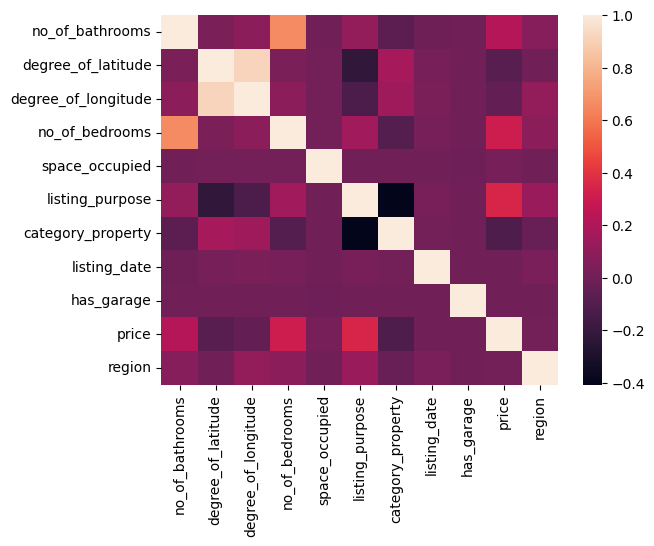

In [159]:
sns.heatmap(train_encoded.corr())

## Modeling

In [161]:
X_train = train_encoded.drop(columns=['price'])

In [162]:
y_train = train_encoded.price

<Axes: >

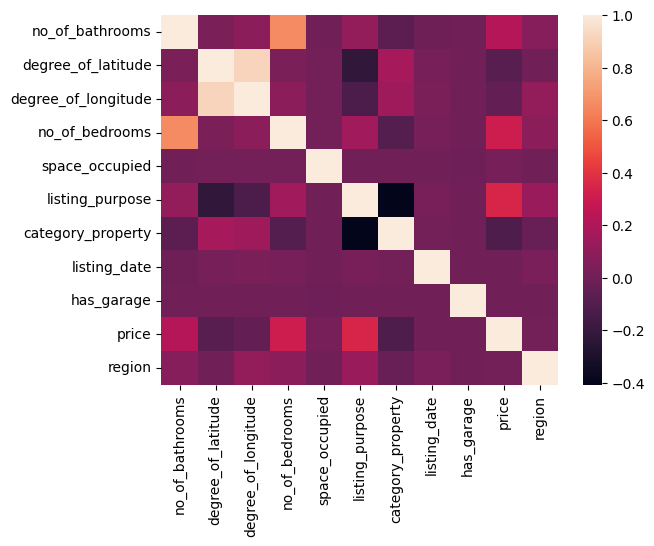

In [166]:
sns.heatmap(train_encoded.corr())

/tmp/ipykernel_33/375460187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

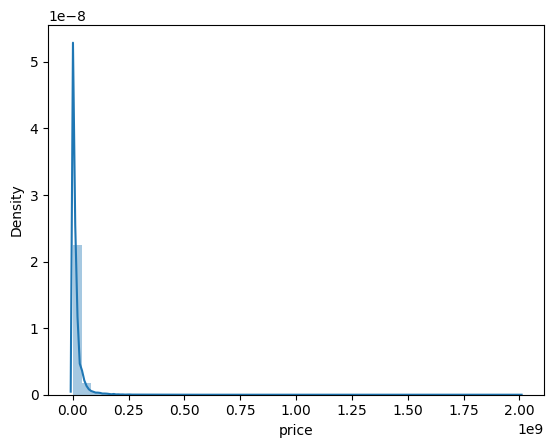

In [174]:
sns.distplot(y_train)

### Splitting

In [276]:
from sklearn.model_selection import train_test_split

X_train_splitted, X_test_splitted, y_train_splitted, y_test_splitted = train_test_split(X_train, y_train, test_size=0.3, random_state=77)

### Training XGBOOST

In [274]:
# # Import Random Forest Regressor
# from xgboost import XGBRegressor

# # Create a Random Forest Regressor
# xgb = XGBRegressor(max_depth=10, eta=0.09, subsample=0.5)

# # Train the model using the training sets 
# xgb.fit(X_train_splitted, y_train_splitted)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.09, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [275]:
# y_pred = xgb.predict(X_test_splitted)
# from sklearn import metrics
# # Model Evaluation
# acc_rf = metrics.r2_score(y_test_splitted, y_pred)
# print('R^2:', acc_rf)
# print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test_splitted, y_pred))*(len(y_test_splitted)-1)/(len(y_test_splitted)-X_test_splitted.shape[1]-1))
# print('MAE:',metrics.mean_absolute_error(y_test_splitted, y_pred))
# print('MSE:',metrics.mean_squared_error(y_test_splitted, y_pred))
# print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_splitted, y_pred)))

R^2: 0.8132891108304974
Adjusted R^2: 0.8132409286186397
MAE: 3243056.6894065575
MSE: 207034612653520.25
RMSE: 14388697.392520292


### Training GradientBoostingRegressor

In [278]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=400, max_depth=8)
gbr.fit(X_train_splitted, y_train_splitted)

y_pred = gbr.predict(X_test_splitted)
from sklearn import metrics
# Model Evaluation
acc_rf = metrics.r2_score(y_test_splitted, y_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test_splitted, y_pred))*(len(y_test_splitted)-1)/(len(y_test_splitted)-X_test_splitted.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test_splitted, y_pred))
print('MSE:',metrics.mean_squared_error(y_test_splitted, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_splitted, y_pred)))

R^2: 0.8371459254220411
Adjusted R^2: 0.8371038996486216
MAE: 2897619.9039347027
MSE: 180580952719293.6
RMSE: 13438041.253073068


### Training RandomForestRegressor

In [236]:
# # Import Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor

# # Create a Random Forest Regressor
# rfr = RandomForestRegressor(n_estimators=300, max_depth=20)

# # Train the model using the training sets 
# rfr.fit(X_train_splitted, y_train_splitted)

RandomForestRegressor(max_depth=20, n_estimators=300)

### Model Evaluation

In [238]:
# y_pred = rfr.predict(X_test_splitted)
# from sklearn import metrics
# # Model Evaluation
# acc_rf = metrics.r2_score(y_test_splitted, y_pred)
# print('R^2:', acc_rf)
# print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test_splitted, y_pred))*(len(y_test_splitted)-1)/(len(y_test_splitted)-X_test_splitted.shape[1]-1))
# print('MAE:',metrics.mean_absolute_error(y_test_splitted, y_pred))
# print('MSE:',metrics.mean_squared_error(y_test_splitted, y_pred))
# print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_splitted, y_pred)))

R^2: 0.8482016026733186
Adjusted R^2: 0.8481624299042735
MAE: 2899121.993781723
MSE: 173741000357132.72
RMSE: 13181084.946131434


# Testing on Test Data

In [221]:
X_train = train_encoded.drop(columns=['price'])
y_train = train_encoded.price
X_test = test_encoded

In [279]:
y_pred = gbr.predict(X_test)
y_pred

array([3.18429696e+08, 4.43438163e+07, 1.48390958e+07, ...,
       2.91705374e+06, 1.48326228e+05, 3.14931118e+05])

### Saving Predictions

In [280]:
pd.DataFrame({"rowID": np.arange(1, len(y_pred)+1), "price": y_pred}).set_index('rowID').to_csv('submission.csv')